In [2]:
print("")

In [3]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [6]:
from scipy import stats

In [7]:
from datetime import datetime

In [38]:
tech_list = ['AAPL','GOOG','TSLA','AMZN']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [30]:
"""for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)"""

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
AAPL = pd.read_csv('Apple_stock.csv', index_col='Date')
GOOG = pd.read_csv('Google_stock.csv', index_col='Date')
MSFT = pd.read_csv('MicroSoft_stock.csv', index_col='Date')
AMZN = pd.read_csv('Amazon_stock.csv', index_col='Date')

In [10]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,147.463501,148.426498,147.250000,148.063995,148.063995,13256000
2021-12-28,148.374496,148.374496,145.935501,146.447998,146.447998,18624000
2021-12-29,146.429504,147.183746,145.504501,146.504501,146.504501,17022000
2021-12-30,146.449997,147.062500,145.758499,146.002502,146.002502,12978000
2021-12-31,145.544006,146.365005,144.677505,144.679504,144.679504,17298000


In [33]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,153.920520,156.024200,151.801120,153.955480,153.520856,8.781345e+07
std,13.121911,13.010978,13.199822,13.185141,12.979849,2.371325e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,143.484997,146.572502,141.115005,143.757500,143.385063,7.227205e+07
50%,152.660004,155.345001,150.855003,152.994995,152.530830,8.342450e+07
75%,165.010002,167.065002,163.007496,165.247494,164.625633,9.632570e+07
max,178.550003,179.610001,176.699997,178.960007,178.154053,1.826020e+08


In [34]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-10 to 2023-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

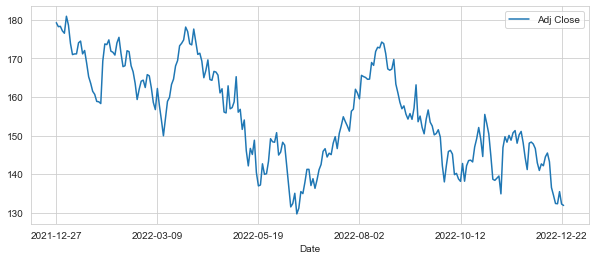

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

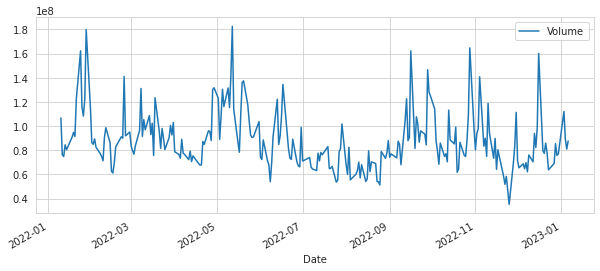

In [36]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

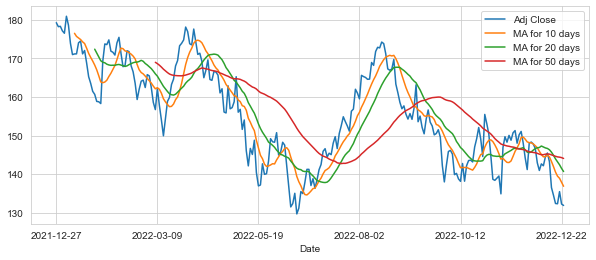

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

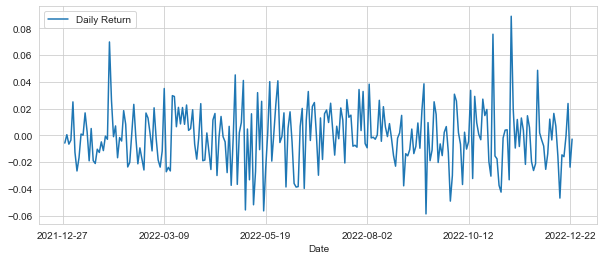

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

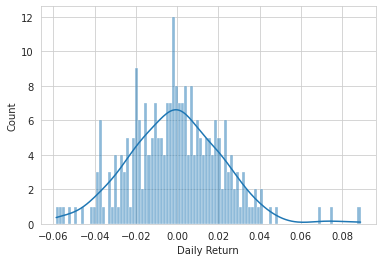

In [40]:
sns.histplot(data=AAPL['Daily Return'].dropna(),bins=100,kde=True)

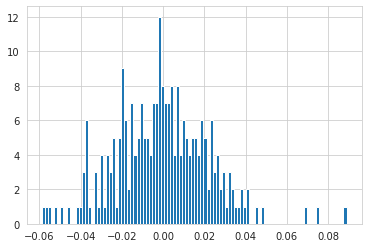

In [41]:
AAPL['Daily Return'].hist(bins=100)

In [40]:
#closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']
#closing_df.to_csv("Closing_df.csv")

[*********************100%***********************]  4 of 4 completed


In [41]:
closing_df.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-01-14,172.071350,162.138000,139.786499,349.869995
2022-01-18,168.820206,158.917496,136.290497,343.503326
2022-01-19,165.270798,156.298996,135.651993,331.883331
2022-01-20,163.560730,151.667496,133.506500,332.089996
2022-01-21,161.472855,142.643005,130.091995,314.633331


In [42]:
closing_df = pd.read_csv("Closing_df.csv", index_col="Date")

In [21]:
closing_df.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-01-14,172.071350,162.138000,139.786499,349.869995
2022-01-18,168.820206,158.917496,136.290497,343.503326
2022-01-19,165.270798,156.298996,135.651993,331.883331
2022-01-20,163.560730,151.667496,133.506500,332.089996
2022-01-21,161.472855,142.643005,130.091995,314.633331


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-01-14,NaN,NaN,NaN,NaN
2022-01-18,-0.018894,-0.019863,-0.025010,-0.018197
2022-01-19,-0.021025,-0.016477,-0.004685,-0.033828
2022-01-20,-0.010347,-0.029632,-0.015816,0.000623
2022-01-21,-0.012765,-0.059502,-0.025576,-0.052566


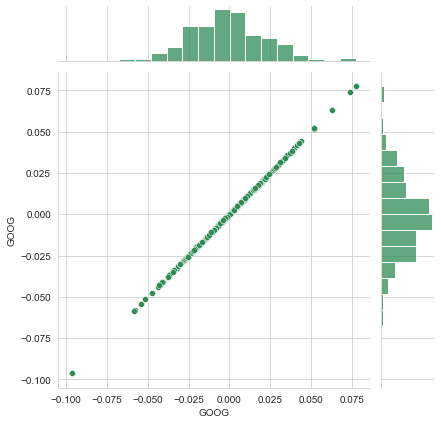

In [24]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

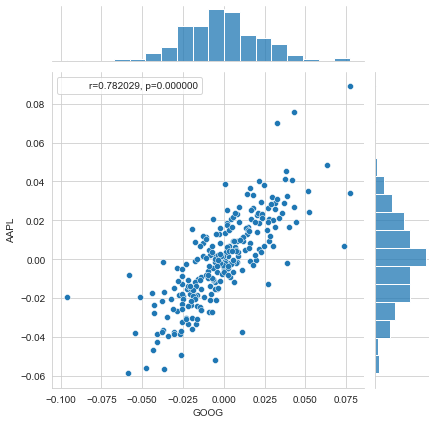

In [25]:
graph = sns.jointplot(x='GOOG',y='AAPL',data=tech_rets,kind='scatter')
r, p = stats.pearsonr(tech_rets['GOOG'].dropna(), tech_rets['AAPL'].dropna())
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

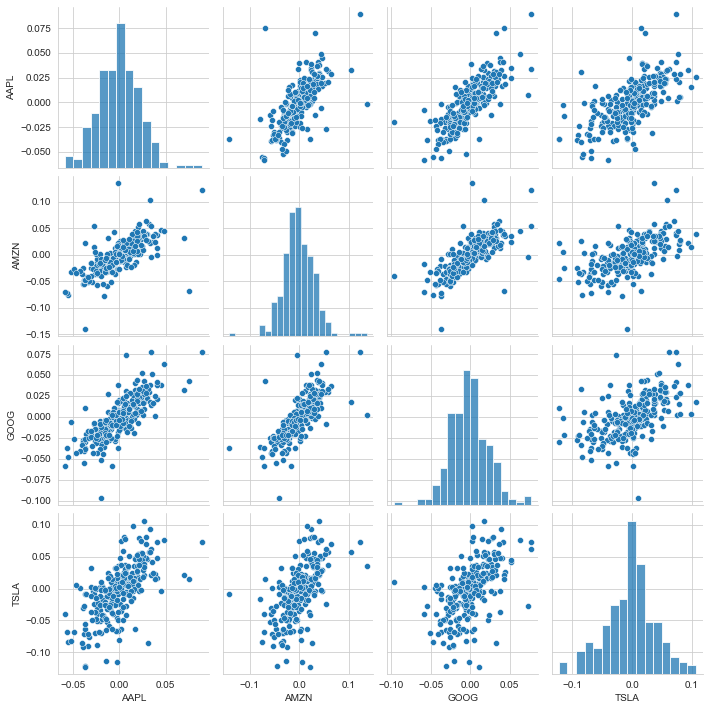

In [26]:
sns.pairplot(tech_rets.dropna())

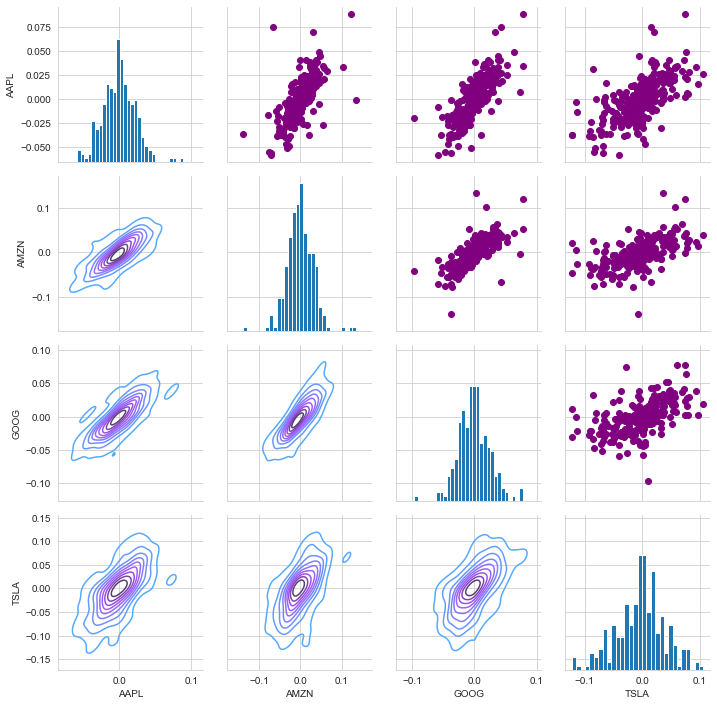

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

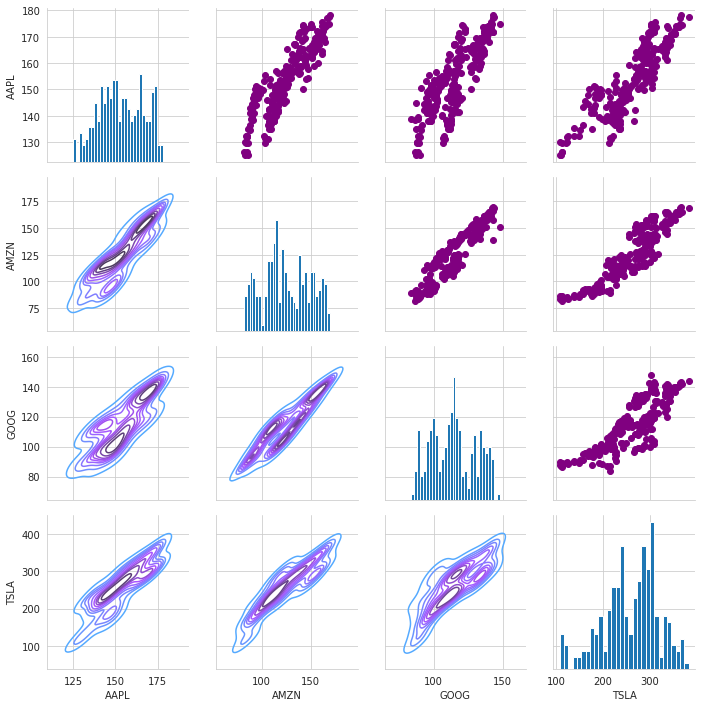

In [50]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

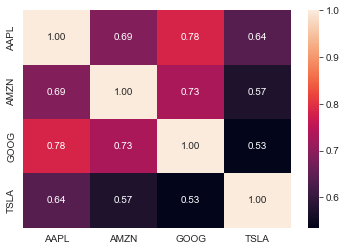

In [28]:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

Risk Analysis

In [29]:
rets = tech_rets.dropna()

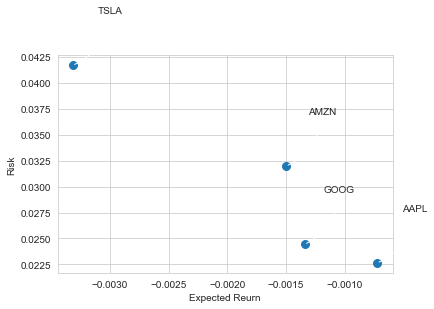

In [33]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel("Expected Reurn")
plt.ylabel("Risk")

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
      label,
      xy = (x,y), xytext = (50,50),
      textcoords = 'offset points', ha = 'right', va = 'bottom',
      arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

Value at Risk

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

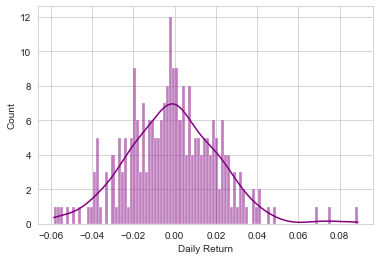

In [44]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color="purple",kde=True)

In [45]:
rets.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-01-18,-0.018894,-0.019863,-0.025010,-0.018197
2022-01-19,-0.021025,-0.016477,-0.004685,-0.033828
2022-01-20,-0.010347,-0.029632,-0.015816,0.000623
2022-01-21,-0.012765,-0.059502,-0.025576,-0.052566
2022-01-24,-0.004864,0.013327,0.002152,-0.014726


In [46]:
rets['AAPL'].quantile(0.05)

-0.03737021376769338



The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.
Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:
ΔSS=μΔt+σϵΔt−−−√

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.
ΔS=S(μΔt+σϵΔt−−−√)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG


In [47]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [48]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)


    for x in range(1,days):

        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))

        drift[x] = mu*dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [50]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,147.463501,148.426498,147.250000,148.063995,148.063995,13256000
2021-12-28,148.374496,148.374496,145.935501,146.447998,146.447998,18624000
2021-12-29,146.429504,147.183746,145.504501,146.504501,146.504501,17022000
2021-12-30,146.449997,147.062500,145.758499,146.002502,146.002502,12978000
2021-12-31,145.544006,146.365005,144.677505,144.679504,144.679504,17298000


Text(0.5, 1.0, 'Monte Carlos Analysis for Google')

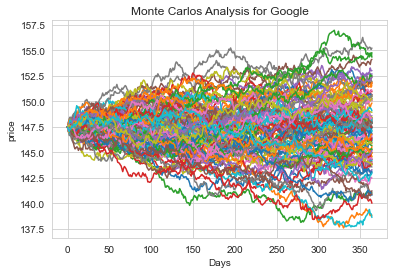

In [51]:
start_price = 147.46

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('price')
plt.title('Monte Carlos Analysis for Google')

In [53]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

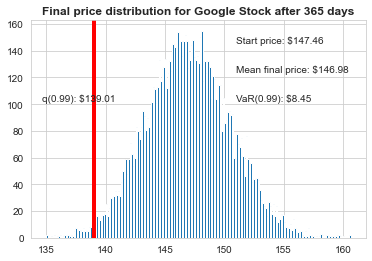

In [54]:
q = np.percentile(simulations,1)

plt.hist(x=simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')